### Вступление

Это набор данных из товаров(платьев)на Amazon, информации об их покупателях и их отзывах о товарах. Благодаря всевозможным отзывам любая платформа стремится становиться все лучше и лучше и максимально удовлетворять своих клиентов. Проанализировав, как они оценивают продукт, что о нем пишут и т. д. и т. д., мы можем обнаружить множество закономерностей, выходящих за рамки удовлетворенности клиентов, о которых можно будет позаботиться в будущем. 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from random import choices

In [30]:
df = pd.read_csv('Women_Dresses_Reviews_Dataset.csv', sep = ',', index_col = 0)


In [31]:
df.head()

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
s.no,,,,,,,,,,
0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


### Датасет содержит следующие данные:


* **age** — возраст покупателя
* **division_name** — имя высокоуровневого дивизиона, к которому относится товар
* **department_name** — имя подразделения, к которому относится товар
* **class_name** — класс продукта или конкретный "тип" одежды (штаны, кофта и т.п.)
* **clothing_id** — ID одежды
* **title** — заголовок комментария
* **review_text** — екст комментария
* **alike_feedback_count** — максимальная зафиксированная частота сердцебиения
* **rating** — рейтинг, выставленный клиентом, от 1 до 5
* **recommend_index** —  Бинарная переменная, готовность клиента рекоммендовать товар

### Дополним датасет
Для дальнейшего анализа добавили целочисленную метрику для комментариев – длину в словах

In [37]:
l = []
for i in df['review_text']: 
    if type(i) == str:
        l.append(len(i.split()))
    else:
        l.append(1)
        
df['comment_len'] = l

Проверим датасет, посмотрим на наличие пропусков, изучим типы данных в столбцах

In [8]:
rows, columns = df.shape
print(f'Строк: {rows} \nСтолбцов: {columns}')

Строк: 23486 
Столбцов: 11


In [9]:
df.info () #применили метод инфо

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   23486 non-null  int64 
 1   division_name         23472 non-null  object
 2   department_name       23472 non-null  object
 3   class_name            23472 non-null  object
 4   clothing_id           23486 non-null  int64 
 5   title                 19676 non-null  object
 6   review_text           22641 non-null  object
 7   alike_feedback_count  23486 non-null  int64 
 8   rating                23486 non-null  int64 
 9   recommend_index       23486 non-null  int64 
 10  comment_len           23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.2+ MB


**Целочисленные столбцы:**

+ clothing_id  - ID одежды
+ age - Возраст
+ rating - рейтинг, выставленный клиентом, от 1 до 5
+ recommended_index - бинарная переменная, готовность клиента рекоммендовать товар
+ alike_feedback_count - количество одинаковых комментариев  
+ comment_len – длина комментариев в словах


**Столбцы с текстом (object):**

+ title - заголовок комментария
+ review_text - текст комментария
+ division_name - имя высокоуровневого дивизиона, к которому относится товар
+ department_name - имя подразделения, к которому относится товар (вверх, низ, топы, платья)
+ class_name - класс продукта или конкретный "тип" одежды (штаны, кофта и т.п.)

In [10]:
df = df.dropna(axis = 0, subset  = ['division_name','department_name','class_name'])
#убрали пропуски только по этим колонкам, поскольку пока title и review_text не дадут полезной информации

Пропуски остались в комментариях, но для анализа они пока не понадобятся, поэтому их можно не трогать

Посмотрим также на уникальные значения в категориальных переменных и их частоту

In [11]:
df.division_name.value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: division_name, dtype: int64

Наиболее часто встречающийся дивизион - General (одежда обычных размеров)

In [13]:
df['class_name'].nunique() #узнаем количество уникальных значений

20

В датасете встречаются 20 уникальных типов одежды

### Анализ количественных фичей

In [14]:
quantative_columns = ['age', 'rating', 'recommend_index', 'alike_feedback_count'] 
#создадим отдельный список количественных фичей

In [15]:
df[quantative_columns].describe()

,age,rating,recommend_index,alike_feedback_count
count,23472.000000,23472.000000,23472.000000,23472.000000
mean,43.200707,4.195552,0.822256,2.537151
std,12.280913,1.110188,0.382305,5.703597
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


Средний возраст комментирующих 43  
Средний рейтинг всех комментариев одежды - 4.19 (пока не совсем релевантно, поскольку одежда может повторяться)  
В среднем комментирующие склоняются к тому, чтобы рекоммендовать приобретенный товар (среднее 0.82)  
Среднее кол-во одинаковых комментариев - 2.53 (максимально 122)  
Более 50% оценок - 5 баллов. Это означает, что чаще всего люди оставляют отзыв на товар, когда он им понравился.  

### Посмотрим на распределения возраста комментирующих



[Text(0.5, 1.0, 'Распределение возраста'),
 Text(0.5, 0, 'Возраст'),
 Text(0, 0.5, 'Количество')]

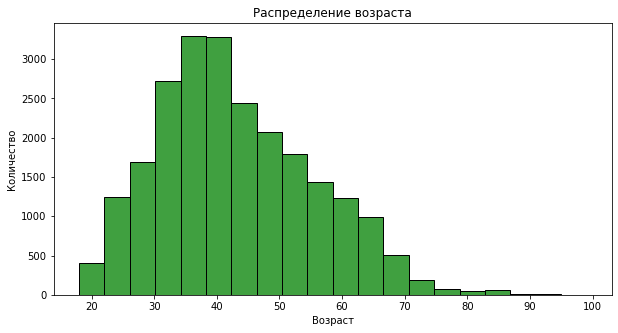

In [18]:
plt.figure(figsize = (10,5))

sns.histplot(x = 'age', data = df, bins = 20, color = 'green') \
    .set(title='Распределение возраста',
        xlabel = 'Возраст',
        ylabel = 'Количество')

Распределение возраста немного похоже на нормальное, возможно максимальный возраст 99, это выброс. 
<br> Чаще всего комментируют покупатели в возрасте от 30 до 50.

[Text(0.5, 1.0, 'Распределение возраста'), Text(0, 0.5, 'Возраст')]

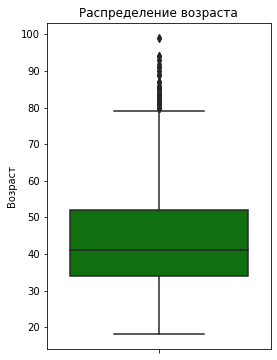

In [20]:
plt.figure(figsize = (4,6))
sns.boxplot(y = 'age', data = df, color = 'green').set(title='Распределение возраста', ylabel = 'Возраст')

Медианное значение возраста немного больше 40 лет. Также из графика видно, что возраст выше 80 является выбросом для данного датасета

Среднее значение возраста: 

In [21]:
int(df ['age'].mean())

43

#### Индекс рекомендаций 

Одной из ключевых характеристик данного датасета является индекс рекомендаций, отражающий готовность пользователей рекомендовать купленный товар. 

На приведенных гистограммах рассмотрим соотношение количества товаров с рекомендациями к количеству товаров без них:

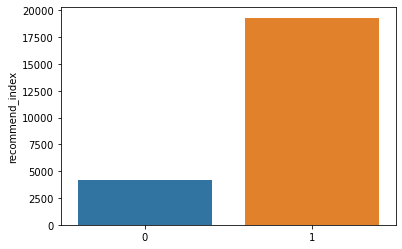

In [22]:
sns.barplot(x=df['recommend_index'].value_counts().index, y=df['recommend_index'].value_counts())
plt.show()

Как видно из графика лишь меньше трети товаров остаются без рекомендации к покупке. 

#### Влияние возраста на индекс рекомендаций 

С помощью скрипичных диаграмм сравним влияние возраста на наличие положительного индекса рекомендации

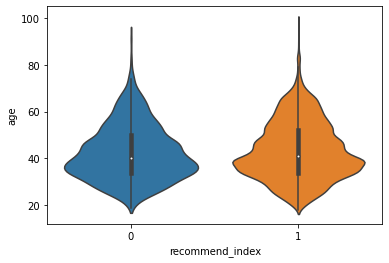

In [24]:
sns.violinplot(x=df['recommend_index'], y=df['age'], cut=1)
plt.show()



Диаграммы схожи, однако заметно, что диаграмма с положительным значением индекса рекомендаций имеет более резкие изменения в промежутках от 25 до 27 и  от 41 до 50.

### Тепловая карта

Построим тепловую карту (матрицу кореляции) для изучения того, какие признаки больше всего влияют друг на друга. 

<AxesSubplot:>

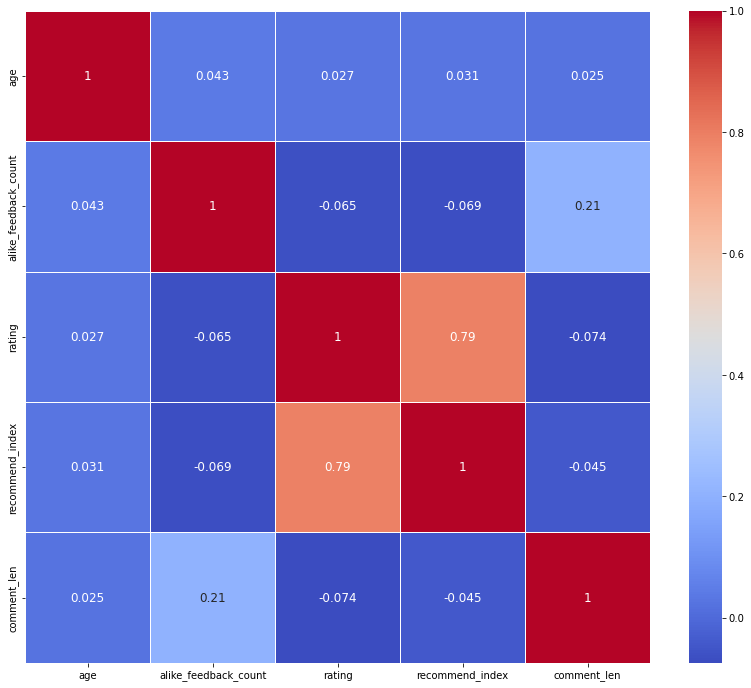

In [40]:
cols_num = ['age', 'alike_feedback_count', 'rating', 'recommend_index', 'comment_len']
correlation = df.corr().loc[cols_num, cols_num]
fig , ax = plt.subplots(figsize = (14,12)) #для размешения рядом, опр размера

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='coolwarm',
            linecolor="white", annot_kws = {'size':12})

Наиболее тесно друг с другом связаны рейтинг и индекс рекомендации. Однако, неожиданной информацией стало то, что количество одинаковых отзывов вносит отрицательный вклад в рейтинг. Отсюда можем предположить, что большинство одинаковых комментариев являются негативными, либо накрученными ботами, чтобы создать положительное впечатление о товаре, вопреки низкому рейтингу.

#### Рассмотрим осевую матрицу 

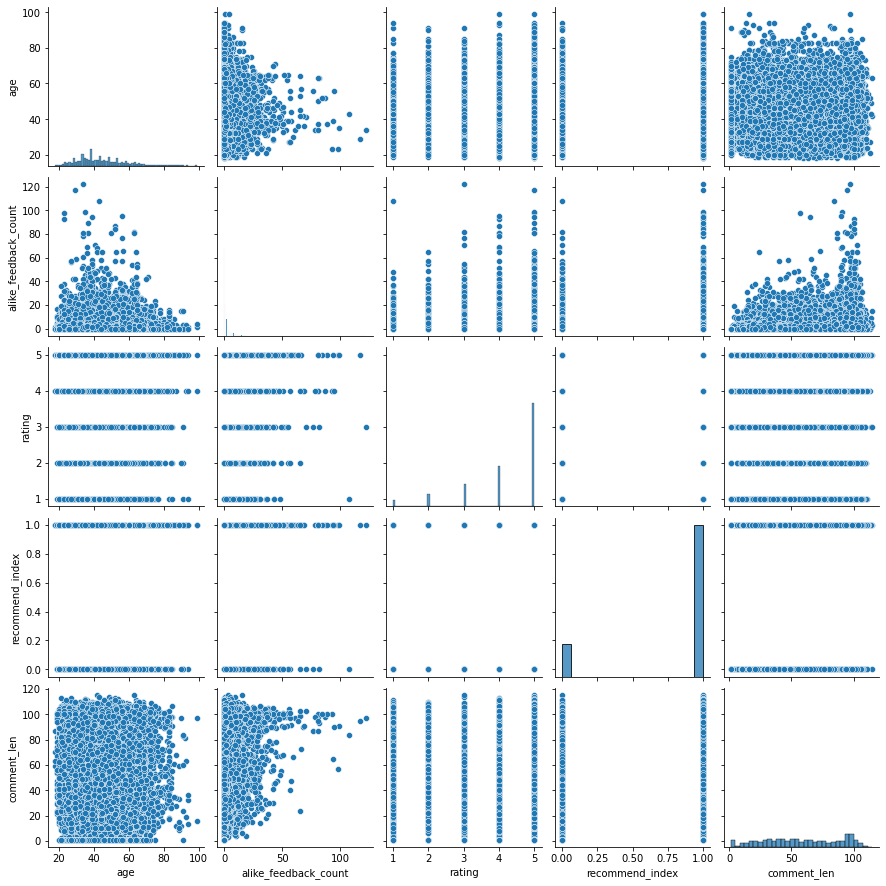

In [42]:
sns.pairplot(df[cols_num])

Отсюда можно сделать следующие выводы:
 - Чем больше длина комментария, тем выше вероятность, что он уникальный
 - Пожилые люди редко пишут длинные комментарии
 - Пожилые люди почти не пишут повторяющиеся комментарии
 - Для анализа и предсказывания рейтинга товара необходимо прибегнуть к более сложным инструментам

###  Критерий хи-квадрта

В приведенном датасете отсутствует информация о поле покупателей. Возьмем для данного датасета распределение полов пользователей, как у онлайн покупок одежды. Добавим колонку 'sex' в датасет, где 0 это женщины, а 1 это мужчин:



In [43]:
df['sex'] = [choices((0,1), weights=(71, 49))[0] for i in range(len(df['recommend_index']))]
df.head()

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,comment_len,sex
s.no,,,,,,,,,,,,
0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1,40,1
1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1,99,1
2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0,38,0
3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1,99,1
4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1,97,1


В качестве нулевой гепотизы H0 возьмем предположение, что женщины и мужчины одинаково часто рекомендуют товары другим покупателям.

Сгрупппируем датасет по полу и индексу рекомендаций:

In [44]:
ct_o = df.groupby('sex')['recommend_index'].value_counts().unstack()
ct_o

recommend_index,0,1
sex,,
0,2441,11279
1,1731,8035


В нашем случае наблюдаемые частоты это количество мужчин и женщин.
Выберем коэфициент $\alpha$	равный 0.05, ему соответствует критическое значение 3.84

In [46]:
aplha = 0.05
critical_value = 3.84

Посчитаем количество степеней свободы

In [47]:
dof = (ct_o.shape[0] - 1) * (ct_o.shape[1] - 1)
dof

1

Для того, чтобы рассчитать критерий согласия Пирсона, нам нужно найти разницу между наблюдаемым (фактическим) и ожидаемым (теоретическим) количеством наблюдений в интересующих нас категориях.  
Наблюдаемыми частотами соответственно будут те, которые мы рассчитаем на основе выборки $f_e$, а теоретическими те, которые мы рассчитаем на основе нулевой гипотезы $f_0$.
Вычислим их:

In [49]:
n_total = ct_o.sum().sum()
n_target_0 = ct_o[0].sum()
n_target_1 = ct_o[1].sum()

p_target_0 = n_target_0 / n_total
p_target_1 = n_target_1 / n_total

n_women = ct_o.iloc[0].sum()
n_men = ct_o.iloc[1].sum()

f_e_target_0_women = n_women * p_target_0
f_e_target_1_women = n_women * p_target_1

f_e_target_0_men = n_men * p_target_0
f_e_target_1_men = n_men * p_target_1

ct_e = np.array([[f_e_target_0_women, f_e_target_1_women], [f_e_target_0_men, f_e_target_1_men]])

Нашли наблюдаемые и ожидаемые частоты.   
Теперь применим критерий хи квадрат:
$
\chi^2 = \sum{\frac{(f_o - f_e)^2}{f_e}}
$

In [51]:
chi_square = ((ct_o - ct_e)**2/ct_e).sum().sum()

Сравним полученное значение с табличным критическим значением для заданного $\alpha$

In [53]:
if chi_square > critical_value:
    print('Нулевая гипотеза верна')
else:
    print('Нулевая гипотеза не верна')

Нулевая гипотеза не верна


Таким образом, нам удалось установить, что мужчины и женщины с разной вероятностью рекомендуют товары к покупке.

###  t-тест

Выберем нулевую гипотезу так:
- Предположим, что при большом количестве покупателей и товаров внутри категорий будет сохраняться один и тот же средний рейтинг.

Проведем тесты для категорий:
 - Jeans
 - Pants  

Для этого сформируем два списка из первоначального датасета:
 - j_r - список рейтингов товаров категории Jeans
 - j_p - список рейтингов товаров категории Pants

In [56]:
from scipy.stats import ttest_ind


j_r, p_r = [], []

for i, j in zip(df['class_name'], df['rating']):
    if i == 'Jeans':
        j_r.append(j)
    
    if i == 'Pants':
        p_r.append(j)

Воспользуемся фукнций test_ind модуля scipy.stats для проведения t-теста и функцией проверки гипотезы из лекции

In [57]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')


t_critical = 1.9667      
p = ttest_ind(j_r, p_r)[-1]

hypothesis_check(p, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


Также сделает проверку для Поправки Уэлча

In [59]:
p = ttest_ind(j_r, p_r, equal_var= False)[-1]

hypothesis_check(p, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


По результатам проведенных t-тестов можем сказать, что даже при большом количество продаж средний рейтинг категорий не совпадает.

 ### Линейная регрессия 

Используя линейную регрессию, попробуем предсказать рекомендацию пользователя, основываясь на поставленным им рейтинге.

In [61]:
import statsmodels.api as sm



df = pd.read_csv('Women_Dresses_Reviews_Dataset.csv', sep = ',', index_col = 0)

x = df['rating'].copy().to_numpy()
y = df['recommend_index'].copy().to_numpy()

В качестве обучающей набора возьмем 80% датасета

In [63]:
train_x = x[:int(len(x)/100 * 80)]
train_y = y[:int(len(y)/100 * 80)]

В качестве тестового набора возьмем оставшиеся 20% датасета

In [64]:
test_x = x[int(len(x)/100 * 80):]
test_y = y[int(len(y)/100 * 80):]

Обучим модель

In [65]:
log_reg = sm.OLS(train_y, train_x).fit()

yhat = log_reg.predict(test_x)
prediction = list(map(round, yhat))

Рассмотрим круговую диаграмму, отражающую на сколько удачно наша модель предсказывает рекомендации пользователей. 

<AxesSubplot:ylabel='value'>

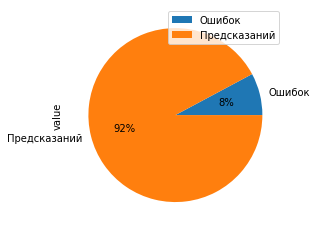

In [66]:
hit, miss = 0, 0
for i, j in zip(prediction, test_y):
    if int(i) == int(j):
        hit += 1
    else: 
        miss += 1

df = pd.DataFrame({'Logistic Regression':['Предсказаний', 'Ошибок'], 'value':[hit, miss]})
df.groupby(['Logistic Regression']). sum ().plot(kind='pie', y='value', autopct='%1.0f%%')

Используя линейную регрессию, нам удалось в 92% случаев предсказать рекомендацию пользователя.

### Логистическая регрессия

Проведем аналогичное исследование, используя логическую регрессию.

In [69]:
df = pd.read_csv('Women_Dresses_Reviews_Dataset.csv', sep = ',', index_col = 0)

x = df['rating'].copy().to_numpy()
y = df['recommend_index'].copy().to_numpy()

В качестве обучающей набора возьмем 80% датасета

In [71]:
train_x = x[:int(len(x)/100 * 80)]
train_y = y[:int(len(y)/100 * 80)]

В качестве тестового набора возьмем оставшиеся 20% датасета

Обучим модель

In [72]:
log_reg = sm.Logit(train_y, train_x).fit()

yhat = log_reg.predict(test_x)
prediction = list(map(round, yhat))

Optimization terminated successfully.
         Current function value: 0.340682
         Iterations 6


Рассмотрим круговую диаграмму, отражающую на сколько удачно наша модель предсказывает рекомендации пользователей. 

<AxesSubplot:ylabel='value'>

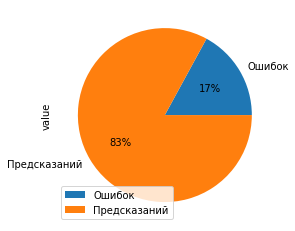

In [73]:
hit, miss = 0, 0
for i, j in zip(prediction, test_y):
    if int(i) == int(j):
        hit += 1
    else: 
        miss += 1

df = pd.DataFrame({'Logistic Regression':['Предсказаний', 'Ошибок'], 'value':[hit, miss]})
df.groupby(['Logistic Regression']). sum ().plot(kind='pie', y='value', autopct='%1.0f%%')

Используя логиcтическую регрессию, нам удалось в 83% случаев предсказать рекомендацию пользователя.
Можно сделать вывод, что линейная регрессия подходит значительно лучше для предсказания рекомендации пользователя по поставленному рейтингу. 

Также в выводе ко всему анализу стоит отметить, что каждому производителю и администраторам платформ по продаже товаров важно обращать внимание на рейтинг товаров и работать с отзывами, особенно негативными, реагировать на запросы своих клиентов. Это позволит им сохранять устойчивое положение в условиях высокой конкуренции на рынке.